## 1. Read the data and perform some wrangling

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,1/25/08,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,1/25/08,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,1/25/08,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,1/25/08,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,1/25/08,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,11/22/16,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,11/22/16,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,11/22/16,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,11/22/16,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [14]:
# change the data type: string to date
df1 = df.copy()
df1['date_created'] = df1['date_created'].apply(pd.to_datetime, 1)
df1['time_created'] = df1['time_created'].apply(pd.to_datetime,1, unit = 's')

In [15]:
# add columns year, month, weekday, 
df1['year'] =df1['time_created'].dt.year
df1['weekday'] = df1['time_created'].dt.day_name()
df1['month'] = df1['time_created'].dt.month
df1['hour'] = df1['time_created'].dt.hour

In [16]:
df1.head(5)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,weekday,month,hour
0,2008-01-25 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,Friday,1,3
1,2008-01-25 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,Friday,1,3
2,2008-01-25 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,Friday,1,3
3,2008-01-25 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,Friday,1,3
4,2008-01-25 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,Friday,1,15


## 2. Yearly changes in the number of news and their corresponding up votes

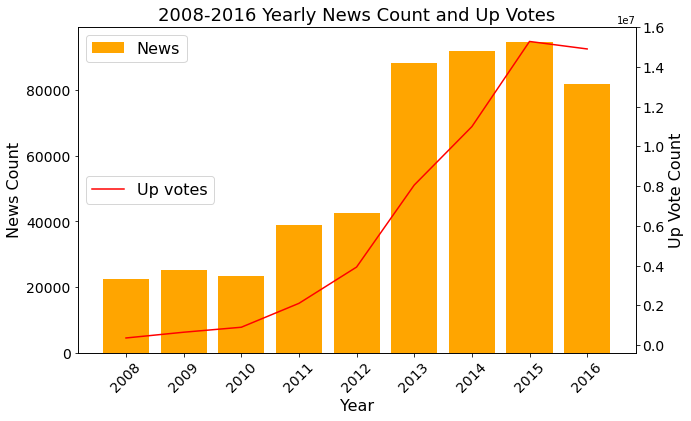

In [82]:
year_count = df1.groupby('year').count().reset_index()
year_upvote = df1.groupby(['year']).sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(year_count['year'], year_count['title'], color = 'orange', label = 'News')
ax2 = ax1.twinx()
ax2.plot(year_upvote['year'], year_upvote['up_votes'], color = 'red', label = 'Up votes')
ax1.set_xticks(np.arange(2008, 2017))
ax1.set_xticklabels(year_count['year'], rotation = 45)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_ylabel('News Count', fontsize = 16)
ax2.set_ylabel('Up Vote Count', fontsize = 16)
ax1.legend(fontsize = 16)
ax2.legend(fontsize = 16,loc = 'center left')
plt.title('2008-2016 Yearly News Count and Up Votes', fontsize = 18)

fig.savefig('Yearly trends.png', bbox_inches = 'tight');

## 3. Monthly changes in the number of news and their corresponding up votes

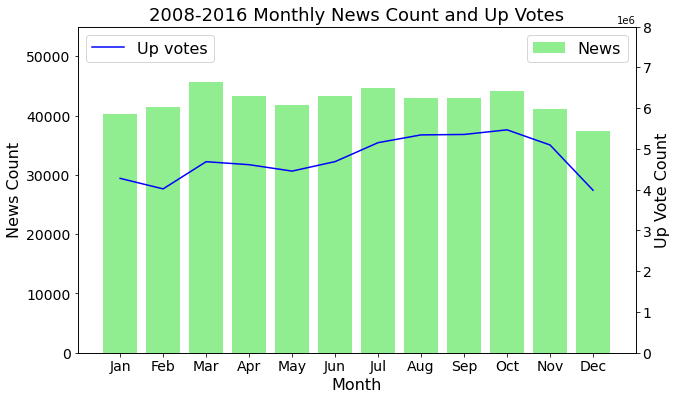

In [83]:
month_count = df1.groupby('month').count().reset_index()
month_upvote = df1.groupby('month').sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(month_count['month'], month_count['title'], color = 'lightgreen', label = 'News')
ax2 = ax1.twinx()
ax2.plot(month_upvote['month'], month_upvote['up_votes'], color = 'blue', label = 'Up votes')
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.set_xlabel('Month', fontsize = 16)
ax1.set_ylabel('News Count', fontsize = 16)
ax2.set_ylabel('Up Vote Count', fontsize = 16)
ax2.set_ylim((0, 0.8e7))
ax1.set_ylim((0, 55000))
ax1.legend(fontsize = 16)
ax2.legend(fontsize = 16,loc = 'upper left')
plt.title('2008-2016 Monthly News Count and Up Votes', fontsize = 18)

fig.savefig('Monthly trends.png', bbox_inches = 'tight');

## 4. Time series (daily) of up votes anomaly detection with the LSTM autorencoder

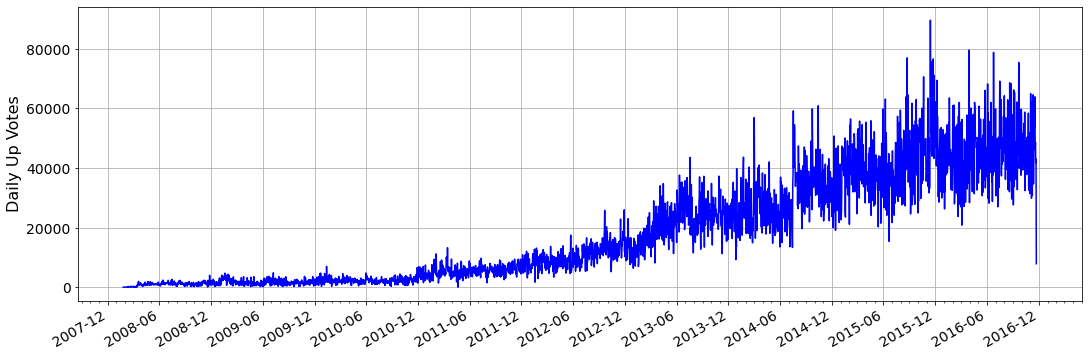

In [85]:
day_upvote = df1.groupby(['date_created']).sum().reset_index() # create the df with daily up votes

fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(day_upvote['date_created'], day_upvote['up_votes'], color = 'blue')

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  
ax.grid(True)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel('Daily Up Votes', fontsize = 16)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

fig.savefig('Daily trends.png', bbox_inches = 'tight');

## -LSTM Autoencoder

In [20]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [23]:
# train test split
train = day_upvote.loc[day_upvote['date_created'] <= '2015-7-03']
test = day_upvote.loc[day_upvote['date_created'] > '2015-7-03']

train.shape, test.shape

((2715, 7), (508, 7))

In [24]:
# standardize the data
scaler = StandardScaler()
scaler = scaler.fit(train[['up_votes']])

train['up_votes'] = scaler.transform(train[['up_votes']])
test['up_votes'] = scaler.transform(test[['up_votes']])

<ipython-input-24-a78f7b57cfaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['up_votes'] = scaler.transform(train[['up_votes']])
<ipython-input-24-a78f7b57cfaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['up_votes'] = scaler.transform(test[['up_votes']])


In [25]:
TIME_STEPS=15 # set the memory of 15 days

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['up_votes']], train['up_votes'])
X_test, y_test = create_sequences(test[['up_votes']], test['up_votes'])

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (2700, 15, 1)
Testing shape: (493, 15, 1)


In [26]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 15, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 15, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], 
                    shuffle=False)

Epoch 1/100
76/76 [==============================] - 9s 63ms/step - loss: 0.2922 - val_loss: 0.5822
Epoch 2/100
76/76 [==============================] - 4s 52ms/step - loss: 0.1729 - val_loss: 0.5248
Epoch 3/100
76/76 [==============================] - 3s 45ms/step - loss: 0.1462 - val_loss: 0.5636
Epoch 4/100
76/76 [==============================] - 3s 46ms/step - loss: 0.1532 - val_loss: 0.5110
Epoch 5/100
76/76 [==============================] - 3s 42ms/step - loss: 0.1482 - val_loss: 0.5027
Epoch 6/100
76/76 [==============================] - 4s 51ms/step - loss: 0.1670 - val_loss: 0.4960
Epoch 7/100
76/76 [==============================] - 3s 40ms/step - loss: 0.1573 - val_loss: 0.4981
Epoch 8/100
76/76 [==============================] - 3s 45ms/step - loss: 0.1621 - val_loss: 0.4957
Epoch 9/100
76/76 [==============================] - 4s 48ms/step - loss: 0.1553 - val_loss: 0.4925
Epoch 10/100
76/76 [==============================] - 4s 47ms/step - loss: 0.1811 - val_loss: 0.5021

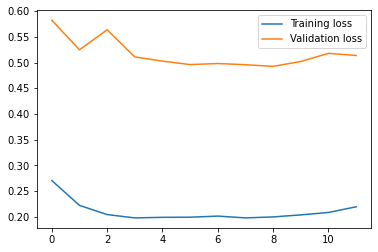

In [28]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [29]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 13ms/step - loss: 0.6718


0.6718300580978394

Reconstruction error threshold: 1.0882469773461905


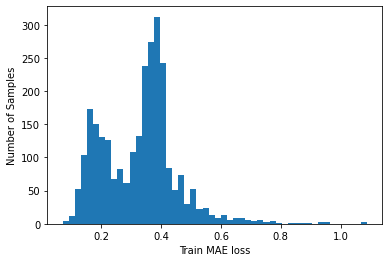

In [30]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

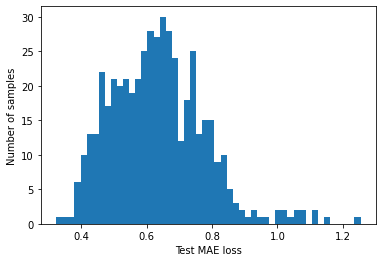

In [31]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [91]:
test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['up_votes'] = test[TIME_STEPS:]['up_votes']

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['date_created'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['date_created'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

fig.write_image('LSTM-TestLoss-vs-Threshold.png');

In [33]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.shape # find the number of anomalies

(4, 10)

In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['date_created'], y=scaler.inverse_transform(test_score_df['up_votes']), name='Up votes'))
fig.add_trace(go.Scatter(x=anomalies['date_created'], y=scaler.inverse_transform(anomalies['up_votes']), mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

fig.write_image('LSTM-Anomalies.png');

## - Extract the anomalies

In [71]:
ano_date = anomalies['date_created']

df_ano = df1[df1['date_created'] == ano_date.iloc[0]] # anomaly news and their corresponding information
for i in range(1, anomalies.shape[0]):
    temp = df1[df1['date_created'] == ano_date.iloc[i]]
    df_ano = df_ano.append(temp)   

In [77]:
# a peek at the anomalies
df_ano.sort_values(['up_votes'], ascending = False)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,weekday,month,hour
417647,2015-11-27 15:48:06,2015-11-27,8055,0,Saudi Arabia just promised to sue anyone who c...,False,maniesf,worldnews,2015,Friday,11,15
416112,2015-11-23 15:21:22,2015-11-23,7253,0,Russia Bans Scientology,False,kipper_tie,worldnews,2015,Monday,11,15
415714,2015-11-22 13:43:06,2015-11-22,7108,0,Paris city police commissioner arrived at Bata...,False,EmeraldIbis,worldnews,2015,Sunday,11,13
415951,2015-11-23 03:26:19,2015-11-23,6936,0,Australia passes law banning anti-vax parents ...,False,JackdeAlltrades,worldnews,2015,Monday,11,3
417470,2015-11-27 00:47:41,2015-11-27,6911,0,Coca-Cola s chief scientist and heath officer ...,False,toomanyairmiles,worldnews,2015,Friday,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
415897,2015-11-22 23:50:57,2015-11-22,0,0,Belgian police arrest 16 terror suspects after...,False,Qwertysapiens,worldnews,2015,Sunday,11,23
417486,2015-11-27 03:49:19,2015-11-27,0,0,Rescued Russian pilot who gave an interview ...,False,vdinets,worldnews,2015,Friday,11,3
416123,2015-11-23 15:44:14,2015-11-23,0,0,Cameron Pledges $18 Billion Army Upgrade Amid ...,False,i--O-U-F-A,worldnews,2015,Monday,11,15
413201,2015-11-15 19:11:23,2015-11-15,0,0,Iraq warned US-led coalition of assault before...,False,p-_-q,worldnews,2015,Sunday,11,19


## - Number of news in each of the anomaly dates

In [81]:
df_ano.groupby(['date_created']).count().reset_index()

,date_created,time_created,up_votes,down_votes,title,over_18,author,category,year,weekday,month,hour
0,2015-11-15,283,283,283,283,283,283,283,283,283,283,283
1,2015-11-22,308,308,308,308,308,308,308,308,308,308,308
2,2015-11-23,391,391,391,391,391,391,391,391,391,391,391
3,2015-11-27,332,332,332,332,332,332,332,332,332,332,332


## - Number of up votes in each of the anomaly dates

In [80]:
df_ano.groupby(['date_created']).sum().reset_index()

,date_created,up_votes,down_votes,over_18,year,month,hour
0,2015-11-15,51923,0,False,570245,3113,3986
1,2015-11-22,63320,0,False,620620,3388,4284
2,2015-11-23,55998,0,False,787865,4301,5074
3,2015-11-27,71052,0,False,668980,3652,4496


## 5. Natural Language Processing using NLTK

In [72]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [73]:
# combine all the news title
def combine(item):
    text = group['title'].iloc[0]
    n = group.shape[0]
    for i in range(1, n):
        text = text + ' ' + group['title'].iloc[i]+ ' '
    return text

# NLP processing using NLTK
def nlp(text):
    # split into words
    tokens = word_tokenize(text)
    # covert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    allWordDist = nltk.FreqDist(stemmed) # words frequency
    mostCom = allWordDist.most_common(20) # the first 20 most common 
    comWord = [mostCom[i][0] for i in range(20)]
    prop = [mostCom[i][1] for i in range(20)]
    prop = [freq/len(stemmed) for freq in prop] # calculate the proportion of the times when the words occur
    return comWord, prop

In [74]:
# combine all the news title and perform NLP
result = nlp(combine(df_ano))
result

(['attack',
  'pari',
  'say',
  'isi',
  'polic',
  'russia',
  'us',
  'terror',
  'kill',
  'syria',
  'state',
  'arrest',
  'russian',
  'islam',
  'refuge',
  'franc',
  'syrian',
  'turkey',
  'suspect',
  'french'],
 [0.020239941238880274,
  0.017954786582877663,
  0.008324491961152371,
  0.00701868930057945,
  0.00669223863543622,
  0.006120949971435567,
  0.0059577246388639515,
  0.005712886640006529,
  0.005712886640006529,
  0.005631273973720721,
  0.005386435974863299,
  0.005304823308577491,
  0.004978372643434261,
  0.004570309312005224,
  0.004570309312005224,
  0.004488696645719416,
  0.004488696645719416,
  0.004407083979433608,
  0.0043254713131478,
  0.004243858646861993])

## - Display the 20 most frequent words in the anomalies

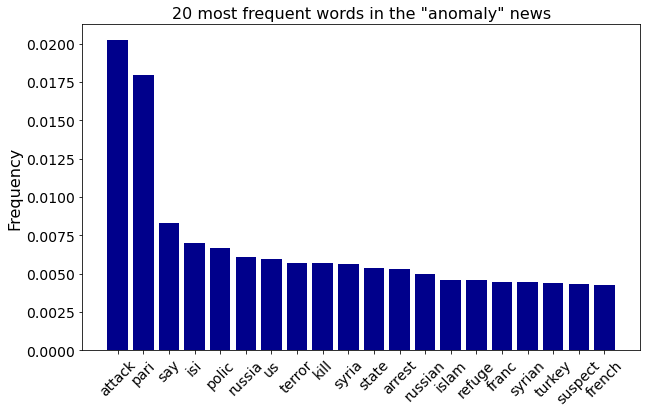

In [90]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(range(20), result[1], color = 'darkblue')
ax.set_xticks(range(20))
ax.set_xticklabels(result[0], rotation = 45)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel('Frequency', fontsize = 16)
plt.title("""20 most frequent words in the "anomaly" news""", fontsize = 16)

fig.savefig('Freqent-words-anomlies.png', bbox = 'tight');